1) Get the silhouette coefficient of the two cluster k-means solution. You'll notice that the silhouette coefficient will turn out to be greater than the one above where cluster number is three. We know that the Iris dataset consists of three different clusters. How do you explain that the silhouette score of the solution with the number of clusters being equal to the correct number of classes is lower than the one where the number of clusters is different from the correct number of classes?

In [15]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine

In [16]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [17]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
# Generate cluster predictions and store them for clusters 2 to 4.  
    pred = KMeans(n_clusters=2, random_state=123).fit_predict(data[counter])
    ypred['clust2_sample' + str(counter)] = pred

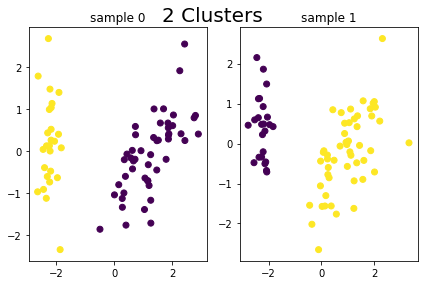

In [18]:
# Make a grid of subplots.
f, axarr = plt.subplots(1, 2)
    
# Make a plot for each sample.
for i in range(2):
        
    # PCA-created features.
    x_sub = ypred['pca_f1_sample{}'.format(i)]
    y_sub = ypred['pca_f2_sample{}'.format(i)]
        
    # Cluster assignments.
    c = ypred['clust2_sample{}'.format(i)]
        
    # Assign the subplot to its place on the grid.
    axarr[i].scatter(x_sub, y_sub, c=c)
    axarr[i].set_title('sample {}'.format(i))
    
# Space out the plots so that the headings don't overlap axis values.
plt.suptitle('2 Clusters', fontsize=20)
plt.tight_layout()
plt.show()


In [19]:
# Silhouette coefficient of the two cluster k-means solution
labels = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels, metric='euclidean'))

0.5817500491982808


The silhouette score of the solution for 3 clusters (the correct number) of classes is lower than the 2 clusters solution because one class is lineary divided from other 2 classes, and the iris dataset mostly appears to have a structure of 2 clusters while it actually contains 3 classes. 

2) The heart disease dataset assignment:<br>
- Split the data randomly into two and apply k-means using two, three and four as the number of clusters as we did in our discussion of the consistency in this checkpoint. Assess the consistency of the solutions using visualization. Which one does seem to be the best one?

In [20]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [29]:
# Make sure the number of rows divides evenly into four samples.
rows = heartdisease_df.shape[0] - heartdisease_df.shape[0] % 2
df = heartdisease_df.iloc[:rows, :]


# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [30]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [31]:
# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [32]:
# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Pass a list of tuples
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

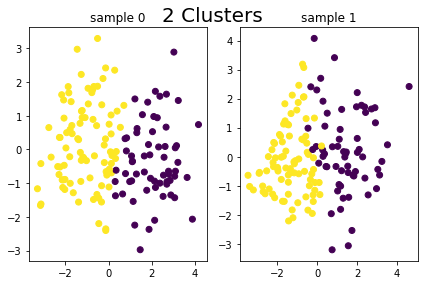

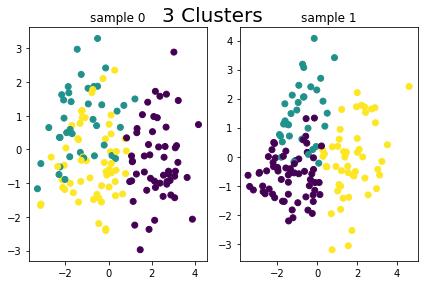

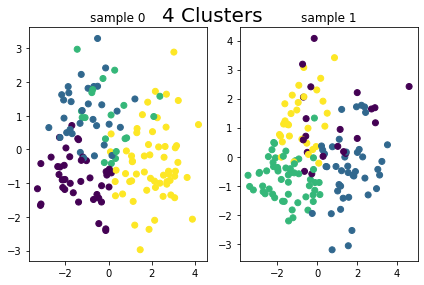

In [33]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

How we expected, from the visualization it looks two clusters is the best and consistet.<br>
- Apply k-means on the whole dataset by setting k is equal two, three and four and get ARI score for each of them. Which model is the best?

In [34]:
# Get predicted clusters.
pred_2c = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3c = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4c = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)

In [36]:
print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_2c)))
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_3c)))
print("ARI for four cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_4c)))

ARI for two cluster k-means: 0.43661540614807665
ARI for three cluster k-means: 0.280694132678885
ARI for four cluster k-means: 0.280694132678885


ARI for the two cluster k-means is the highest which means it is the best.<br>
- Apply k-means on the whole dataset by setting k is equal two, three and four and get silhouette coefficient for each of them. Which model is the best?

In [38]:
# Silhouette coefficient of the two, three, and four cluster k-means solutions
print("Silhouette coefficient for two cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_2c, metric='euclidean')))
print("Silhouette coefficient for three cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_3c, metric='euclidean')))
print("Silhouette coefficient for four cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_4c, metric='euclidean')))

Silhouette coefficient for two cluster k-means: 0.17440650461256255
Silhouette coefficient for three cluster k-means: 0.1286219070218783
Silhouette coefficient for four cluster k-means: 0.1286219070218783


Silhouette coefficient for the two cluster k-means is the highest which means it is the best.